<div style="margin-top: 40px; padding-bottom: 10px; border-bottom: 3px solid #E65100;">
  <h2 style="margin: 0; font-size: 1.9em; color: #FF9800; font-family: 'Segoe UI', sans-serif;">
    📑 Sumário
  </h2>
</div>

<p style="margin-top: 10px; font-size: 1.05em; color: #FFFFFF; line-height: 1.6; text-align: justify; font-family: 'Segoe UI', sans-serif;">


  #
</p>

- [0. Imports](#0)
    - [0.1. Carregamento dos dados](#0.1)
- [1. Analise Inicial](#1)
    - [1.1. Análise da Quantidade de Dados](#1.1)
    - [1.2. Verificação da Existência de Nulos no Dataset](#1.2)
    - [1.3. Verificação do tipo de cada variável](#1.3)
    - [1.4. Criação de Novas Variáveis Utilizando a Variável Timestamp](#1.4)
    - [1.5. Verificação da Cardinalidade de Cada Variável](#1.5)
    - [1.6. Análise estatística](#1.6)
    - [1.7. Verificação de Outliers](#1.7)
- [2. Análise Bivariada](#2)
- [3. Análise Multivarida](#3)

#
<a id="0"></a>

<div style="margin-top: 40px; padding-bottom: 10px; border-bottom: 3px solid #E65100;">
  <h2 style="margin: 0; font-size: 1.9em; color: #FF9800; font-family: 'Segoe UI', sans-serif;">
    📦 0. Imports
  </h2>
</div>

<p style="margin-top: 10px; font-size: 1.05em; color: #000; line-height: 1.6; text-align: justify; font-family: 'Segoe UI', sans-serif;">
Nesta seção, serão realizados os imports das bibliotecas e pacotes necessários para o desenvolvimento do notebook, importantes para gerar os dicionários dos dados.

#
</p>


In [24]:
# Manipulação dos dados:
import pandas as pd
import numpy  as np

# Gráficos:
import matplotlib.pyplot as plt
import seaborn as sns

# Operações com as variáveis:
import math

# Acesso a pastas:
import sys

In [25]:
# Adiciona o diretório ao sys.path para importar utilidades
sys.path.append(r'C:\Users\Yago\Desktop\GitHubLocal\projeto_previsao_consumo_energia\utils')
from utils import generate_metadata, calcular_estatisticas

##

<a id="0.1"></a>
<div id="carregamento-dados" style="margin-top: 40px; padding-bottom: 10px; border-bottom: 3px solid #E65100;">
  <h4 style="margin: 0; font-size: 1.5em; color: #FF9800; font-family: 'Segoe UI', sans-serif;">
    💾 0.1. Carregando o conjunto de dados
  </h4>
</div>

<p style="margin-top: 10px; font-size: 1.05em; color: #000; line-height: 1.6; text-align: justify; font-family: 'Segoe UI', sans-serif;">
Antes de iniciar qualquer análise, é essencial importar o conjunto de dados que será utilizado no projeto. Essa etapa garante que todas as informações necessárias estejam disponíveis para as próximas fases do processo.
</p>


In [26]:
# Arquivo CSV com os dados brutos:
df_raw = pd.read_csv("C:/Users/Yago/Desktop/GitHubLocal/Previs-oConsumoEnergia/1.dados/df_raw.csv")

In [27]:
# visualizando das primeiras linhas do dataframe:
df_raw.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


#
<a id="1"></a>

<div style="margin-top: 40px; padding-bottom: 10px; border-bottom: 3px solid #E65100;">
  <h2 style="margin: 0; font-size: 1.9em; color: #FF9800; font-family: 'Segoe UI', sans-serif;">
    🔍 1. Análise Inicial dos Dados
  </h2>
</div>

<p style="margin-top: 10px; font-size: 1.05em; color: #000; line-height: 1.6; text-align: justify; font-family: 'Segoe UI', sans-serif;">
Nesta etapa inicial, exploramos a estrutura geral do conjunto de dados, observando seu tamanho, tipos de variáveis, e identificando possíveis inconsistências ou valores ausentes. Essa análise fornece uma visão geral importante para guiar as próximas etapas do projeto.

</p>


In [28]:
# Realizando uma cópia do dataframe:
df_analise = df_raw.copy()

<div style="border-left: 6px solid #FF9800; background-color: #f9f9f9; padding: 15px; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0,0,0,0.1);">
  <h3 style="margin: 0; color: #FF5722;">⚠️ Observação</h3>

  <p style="margin-top: 5px; color: rgb(0, 0, 0);">
    É sempre importante realizar uma cópia do dataframe durante o desenvolvimento do código, tanto para manter os dados brutos guardados sem modificações e de fácil acesso, quanto para ter um ponto de recuperação mais rápido. Assim, em vez de compilar novamente todo o código, basta voltar ao ponto da cópia. :)
  </p>
</div>


In [29]:
# visuliazação das primeiras linhas do dataframe:
df_analise.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


<div style="border-left: 6px solid #FF9800; background-color: #f9f9f9; padding: 15px; border-radius: 10px; box-shadow: 0px 2px 4px rgba(213, 148, 148, 0.1);">
  <h3 style="margin: 0; color: #FF5722;">📌 Objetivos da Análise</h3>

  <p style="margin-top: 5px; color: rgb(0, 0, 0);">
    🔍 <strong>1. Compreender o conteúdo dos dados:</strong>
    <ul>
      <li>O que cada coluna representa</li>
      <li>Os tipos de dados (numéricos, categóricos, datas, booleanos)</li>
      <li>Como as variáveis podem estar relacionadas entre si</li>
    </ul>
    🧼 <strong>2. Identificar problemas de qualidade dos dados:</strong>
    <ul>
      <li>Valores faltantes ou nulos</li>
      <li>Dados duplicados</li>
      <li>Outliers (valores muito fora do padrão esperado)</li>
    </ul>
    📊 <strong>3. Visualizar padrões e distribuições:</strong>
    <ul>
      <li>Ver como a energia é consumida ao longo do tempo</li>
      <li>Avaliar como temperatura, ocupação e uso de HVAC afetam o consumo</li>
      <li>Ver se há padrões diferentes em dias de semana vs. feriados</li>
    </ul>
    📈 <strong>4. Guiar decisões de modelagem:</strong>
    <ul>
      <li>A análise inicial ajuda a decidir que tipo de modelo usar (regressão? classificação?)</li>
      <li>Auxilia na engenharia de atributos (criação de novas colunas úteis)</li>
      <li>Pode mostrar a necessidade de transformar variáveis (como normalizar o SquareFootage, por exemplo)</li>
    </ul>
    ⚠️ <strong>5. Evitar erros futuros:</strong>
    <ul>
      <li>Treinando modelos em dados sujos</li>
      <li>Tomando decisões com base em informações incompletas ou enganosas</li>
      <li>Ignorando variáveis-chave ou efeitos importantes</li>
    </ul>
  </p>
</div>


##
<a id="1.1"></a>

<div style="margin-top: 40px; padding-bottom: 10px; border-bottom: 3px solid #E65100;">
  <h4 style="margin: 0; font-size: 1.5em; color: #FF9800; font-family: 'Segoe UI', sans-serif;">
    🔢 1.1. Análise da Quantidade de Dados
  </h4>
</div>

<p style="margin-top: 10px; font-size: 1.05em; color: #000; line-height: 1.6; text-align: justify; font-family: 'Segoe UI', sans-serif;">
Nesta etapa, avaliamos o tamanho do conjunto de dados, verificando a quantidade total de registros e colunas disponíveis. Isso nos ajuda a entender a robustez da base e sua adequação para análises estatísticas ou treinamento de modelos.

##
</p>


In [30]:
# dimensionalidade do dataframe:
df_analise.shape

(1000, 11)

<div style="border-left: 6px solid #FF9800; background-color: #f9f9f9; padding: 15px; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0,0,0,0.1);">
  <h3 style="margin: 0; color: #FF5722;">Comentário: </h3>

  <p style="margin-top: 5px; color: rgb(0, 0, 0);">
    O dataset possui uma dimensão de (1000, 11), ou seja, contém 1.000 registros e 11 variáveis. Dentre as 11 variáveis, 10 são descritivas e fornecem informações relevantes sobre o consumo de energia, ocupação, uso de HVAC, entre outros fatores.

    
    ⚠️ Quantidade de valores na amostra:
    A quantidade de 1000 registros pode limitar o rendimento do modelo, visto que, não temos uma quantidade alta de dados.
  </p>
</div>


##
<a id="1.2"></a>

<div style="margin-top: 40px; padding-bottom: 10px; border-bottom: 3px solid #E65100;">
  <h4 style="margin: 0; font-size: 1.5em; color: #FF9800; font-family: 'Segoe UI', sans-serif;">
     ∅ 1.2. Verificação da Existência de Nulos no Dataset
  </h4>
</div>

<p style="margin-top: 10px; font-size: 1.05em; color: #000; line-height: 1.6; text-align: justify; font-family: 'Segoe UI', sans-serif;">
A verificação da existência de valores nulos é uma etapa importante para garantir a qualidade dos dados.
</p>


In [31]:
# verificação da quantidade de dados nulos:
df_analise.isnull().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

<div style="border-left: 6px solid #FF9800; background-color: #f9f9f9; padding: 15px; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
  <h3 style="margin: 0; color: #FF5722;">📌 Comentário:</h3>

  <p style="margin-top: 5px; color: rgb(0, 0, 0);">
    Como podemos observar na saída da célula, o dataset não apresenta nenhum valor nulo, o que é um excelente indicador para o andamento do estudo.
  </p>
</div>


##
<a id="1.3"></a>

<div style="margin-top: 40px; padding-bottom: 10px; border-bottom: 3px solid #E65100;">
  <h4 style="margin: 0; font-size: 1.5em; color: #FF9800; font-family: 'Segoe UI', sans-serif;">
     🔍 1.3.Verificação do tipo de cada variável
  </h4>
</div>

<p style="margin-top: 10px; font-size: 1.05em; color: #FFFFFF; line-height: 1.6; text-align: justify; font-family: 'Segoe UI', sans-serif;">

</p>

In [32]:
df_analise.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [33]:
# informações gerais do dataframe:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


<div style="border-left: 6px solid #FF9800; background-color: #f9f9f9; padding: 15px; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0,0,0,0.1);">
  <h3 style="margin: 0; color: #FF5722;">📌 Comentários:</h3>

  <p style="margin-top: 5px; color: rgb(0, 0, 0);">

Podemos concluir algumas coisas a partir dessa saída:

- 🔑 **Timestamp**: Podemos extrair informações dessa variável, que serão mais interessantes para o modelo quando separadas em atributos distintos, como **dia**, **mês**, **ano**, **hora**, **período**, **feriado**, etc.
  
- 🏷️ **Variáveis Categóricas**: É necessário aplicar, na seção de pré-processamento, a conversão das variáveis categóricas para numéricas, como **HVACUsage**, **LightingUsage**, **DayOfWeek**, **Holiday** e outras que surgirem da fragmentação da variável **Timestamp**.

- ⚙️ **Normalização**: Identificamos que é necessário realizar a **normalização das variáveis** para melhorar a performance do modelo.

- 🛠️ **Tipo Correto**: Com relação aos **valores máximo e mínimo** de cada variável, principalmente as **numéricas do tipo float**, podemos observar que, ao reduzir o intervalo de variação, podemos otimizar o espaço necessário para o armazenamento desses dados, tornando o conjunto de dados mais leve (isso é fundamental para projetos com grandes volumes de amostra).

- ➕ **Criação de Novas Variáveis**: Com as variáveis disponíveis no dataset, podemos criar novas métricas, como: **EUI – Energy Use Intensity** (Intensidade de Uso de Energia), **Consumo por ocupante**, **Eficiência do sistema HVAC** (Climatização), entre outras.
  </p>
</div>


##
<a id="1.4"></a>


<div style="margin-top: 40px; padding-bottom: 10px; border-bottom: 3px solid #E65100;">
  <h4 style="margin: 0; font-size: 1.5em; color: #FF9800; font-family: 'Segoe UI', sans-serif;">
     🕰️ 1.4.Criação de Novas Variáveis Utilizando a Variável Timestamp
  </h4>
</div>

<p style="margin-top: 10px; font-size: 1.05em; color: #000; line-height: 1.6; text-align: justify; font-family: 'Segoe UI', sans-serif;">

  Conforme foi analisado inicialmente, podemos extrair várias informações da variável **Timestamp** para realizar uma análise mais precisa do consumo de energia, como **dia**, **mês**, **ano**, **hora**, **período**, entre outros.
</p>


In [34]:
# Garantir que a coluna esteja como datetime
# object -> datetime64[ns]
df_analise['Timestamp'] = pd.to_datetime(df_analise['Timestamp'])

# Novas colunas
df_analise['Ano'] = df_analise['Timestamp'].dt.year
df_analise['Mês'] = df_analise['Timestamp'].dt.month
df_analise['Dia'] = df_analise['Timestamp'].dt.day
df_analise['Hora'] = df_analise['Timestamp'].dt.hour

df_analise['Fim_de_Semana'] = df_analise['DayOfWeek'].isin(['Saturday', 'Sunday'])

# Criando uma coluna com o período do dia
def periodo_do_dia(h):
    if 5 <= h < 12:
        return 'Manhã'
    elif 12 <= h < 18:
        return 'Tarde'
    elif 18 <= h < 23:
        return 'Noite'
    else:
        return 'Madrugada'

df_analise['Período'] = df_analise['Hora'].apply(periodo_do_dia)


In [35]:
# verificando o dataset com as novas colunas:
df_analise.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Ano,Mês,Dia,Hora,Fim_de_Semana,Período
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,2022,1,1,0,False,Madrugada
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,2022,1,1,1,True,Madrugada
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,2022,1,1,2,True,Madrugada
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,2022,1,1,3,False,Madrugada
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,2022,1,1,4,False,Madrugada


<div style="border-left: 6px solid #FF9800; background-color: #f9f9f9; padding: 15px; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
  <h3 style="margin: 0; color: #FF5722;">📌 Comentário:</h3>

  <p style="margin-top: 5px; color: rgb(0, 0, 0);">
    Na etapa de preparação do conjunto de dados para o modelo, vamos remover a variável <strong>Timestamp</strong>, visto que já extraímos as informações relevantes para o modelo. No entanto, durante a etapa de análise, manteremos essa variável no dataset.
  </p>
</div>


In [36]:
# Retirando a coluna Timestamp do dataset:
#df_analise.drop(columns=['Timestamp'], inplace=True)

In [37]:
# Apresentandando o dataset sem a variável Timestamp:
#df_analise.head()

##
<a id="1.5"></a>

<div style="margin-top: 40px; padding-bottom: 10px; border-bottom: 3px solid #E65100;">
  <h4 style="margin: 0; font-size: 1.5em; color: #FF9800; font-family: 'Segoe UI', sans-serif;">
     🔷 1.5. Verificação da Cardinalidade de Cada Variável
  </h4>
</div>

<p style="margin-top: 10px; font-size: 1.05em; color: #000; line-height: 1.6; text-align: justify; font-family: 'Segoe UI', sans-serif;">
  A verificação da cardinalidade de cada variável é importante para entender a diversidade de valores que cada uma pode assumir. Este processo nos ajuda a identificar variáveis com um número limitado de valores distintos, como variáveis categóricas, e a observar se alguma delas pode precisar de transformação para garantir que o modelo trabalhe de forma mais eficiente.

  ##
</p>


In [38]:
# Função para extrair os metadata de um dataframe:
metadata_df = generate_metadata(df_analise)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade,min,max,sugestao_tipo
0,Timestamp,datetime64[ns],0,0.0,1000,None,None,None
1,Fim_de_Semana,bool,0,0.0,2,False,True,bool
2,Hora,int32,0,0.0,24,0,23,uint8
3,Dia,int32,0,0.0,31,1,31,uint8
4,Mês,int32,0,0.0,2,1,2,uint8
5,Ano,int32,0,0.0,1,2022,2022,uint16
6,Occupancy,int64,0,0.0,10,0,9,uint8
7,Temperature,float64,0,0.0,1000,20.007565,29.998671,float32
8,Humidity,float64,0,0.0,1000,30.015975,59.969085,float32
9,SquareFootage,float64,0,0.0,1000,1000.512661,1999.982252,float32


<div style="border-left: 6px solid #FF9800; background-color: #f9f9f9; padding: 15px; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0,0,0,0.1);">
  <h3 style="margin: 0; color: #FF5722;">📌 Comentários:</h3>

  <p style="margin-top: 5px; color: rgb(0, 0, 0);">
    A partir dessa saída, podemos destacar alguns pontos importantes:
    <br><br>
    • A variável <strong>ano</strong> não apresenta variabilidade significativa, sendo assim, pode ser descartada para fins de análise e predição.<br>
    • Modificação nos tipos de algumas variáveis. Embora o conjunto de dados seja pequeno, essa mudança pode impactar a análise em conjuntos maiores.<br>
    • É necessário converter algumas variáveis para o formato numérico para que possam ser utilizadas adequadamente nos modelos.
  </p>
</div>


##
<a id="1.6"></a>

<div style="margin-top: 40px; padding-bottom: 10px; border-bottom: 3px solid #E65100;">
  <h4 style="margin: 0; font-size: 1.5em; color: #FF9800; font-family: 'Segoe UI', sans-serif;">
     🔷 1.6. Análise estatística
  </h4>
</div>

<p style="margin-top: 10px; font-size: 1.05em; color: #000; line-height: 1.6; text-align: justify; font-family: 'Segoe UI', sans-serif;">
Nesta etapa, exploramos as principais características estatísticas do conjunto de dados, como média, mediana, desvio padrão, valores mínimos e máximos. 
</p>


In [39]:
# estatísticas descritivas do dataframe:
df_analise.describe()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,Ano,Mês,Dia,Hora
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.00000,1000.000000,1000.000000
mean,2022-01-21 19:29:59.999999744,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873,2022.0,1.25600,13.400000,11.436000
min,2022-01-01 00:00:00,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278,2022.0,1.00000,1.000000,0.000000
25%,2022-01-11 09:45:00,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690,2022.0,1.00000,6.000000,5.000000
50%,2022-01-21 19:30:00,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696,2022.0,1.00000,11.000000,11.000000
75%,2022-02-01 05:15:00,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742,2022.0,2.00000,21.000000,17.000000
max,2022-02-11 15:00:00,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120,2022.0,2.00000,31.000000,23.000000
std,NaN,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112,0.0,0.43664,9.037792,6.913009


In [40]:
# função estatísticas para gerar mais algumas métricas estatísticas
# (moda, amplitude do conjunto, Erro padrão, assimetria, curtose)
# das variáveis numéricas do dataframe:
for coluna in df_analise.columns:
    # Verifica se é do tipo int ou float, mas exclui booleanos
    if pd.api.types.is_numeric_dtype(df_analise[coluna]) and not pd.api.types.is_bool_dtype(df_analise[coluna]):
        estatisticas = calcular_estatisticas(df_analise, coluna, coluna)


----------- Informações sobre o Dataset -----------
Número de linhas do dataset: 1000
Valores únicos da coluna: 1000
----------- Medidas de Posição -----------
média: 24.982026291058794
mediana: 24.751636889884217
Não há moda.
Primeiro Quartil (Q1) [25%]: 22.645070390101022
Segundo Quartil (Mediana, Q2) [50%]: 24.751636889884217
Terceiro Quartil (Q3) [75%]: 27.41817417895418
----------- Medidas de Dispersão -----------
O máximo do conjunto é  29.998670840983927
O minimo do conjunto é  20.00756508361767
A amplitude do conjunto é  9.991105757366256
A variância do conjunto: 8.047717014905778
O desvio padrão do conjunto: 2.836849840034854
O Erro padrão: 0.0897090687439446
O Coeficiente de variação: 11.355563423813136
A assimetria: 0.0884278609675873
A curtose: -1.12


,variável,média,desvio_padrao,assimetria,curtose,valor_min,90%,99%,valor_max,amplitude
0,Temperature,24.982026,2.836850,0.088428,-1.115196,20.007565,29.074157,29.958858,29.998671,9.991106
1,Humidity,45.395412,8.518905,-0.066463,-1.133748,30.015975,57.012124,59.730432,59.969085,29.953110
2,SquareFootage,1500.052488,288.418873,-0.019441,-1.229895,1000.512661,1892.722481,1990.999400,1999.982252,999.469591
3,Occupancy,4.581000,2.865598,-0.055229,-1.233842,0.000000,8.000000,9.000000,9.000000,9.000000
4,RenewableEnergy,15.132813,8.745917,-0.021597,-1.220440,0.006642,27.181490,29.571518,29.965327,29.958685
5,EnergyConsumption,77.055873,8.144112,0.027399,-0.300154,53.263278,87.642020,95.074282,99.201120,45.937841
6,Ano,2022.000000,0.000000,0.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,0.000000
7,Mês,1.256000,0.436640,1.119865,-0.747402,1.000000,2.000000,2.000000,2.000000,1.000000
8,Dia,13.400000,9.037792,0.423712,-1.090196,1.000000,27.000000,31.000000,31.000000,30.000000
9,Hora,11.436000,6.913009,0.012334,-1.198200,0.000000,21.000000,23.000000,23.000000,23.000000


----------- Informações sobre o Dataset -----------
Número de linhas do dataset: 1000
Valores únicos da coluna: 1000
----------- Medidas de Posição -----------
média: 45.39541178594965
mediana: 45.97211619015158
Não há moda.
Primeiro Quartil (Q1) [25%]: 38.29772175706483
Segundo Quartil (Mediana, Q2) [50%]: 45.97211619015158
Terceiro Quartil (Q3) [75%]: 52.420065619974125
----------- Medidas de Dispersão -----------
O máximo do conjunto é  59.96908490414602
O minimo do conjunto é  30.01597450346074
A amplitude do conjunto é  29.953110400685283
A variância do conjunto: 72.57174324321097
O desvio padrão do conjunto: 8.518905049547799
O Erro padrão: 0.26939143127280607
O Coeficiente de variação: 18.766004568295354
A assimetria: -0.06646328982692608
A curtose: -1.13


,variável,média,desvio_padrao,assimetria,curtose,valor_min,90%,99%,valor_max,amplitude
0,Temperature,24.982026,2.836850,0.088428,-1.115196,20.007565,29.074157,29.958858,29.998671,9.991106
1,Humidity,45.395412,8.518905,-0.066463,-1.133748,30.015975,57.012124,59.730432,59.969085,29.953110
2,SquareFootage,1500.052488,288.418873,-0.019441,-1.229895,1000.512661,1892.722481,1990.999400,1999.982252,999.469591
3,Occupancy,4.581000,2.865598,-0.055229,-1.233842,0.000000,8.000000,9.000000,9.000000,9.000000
4,RenewableEnergy,15.132813,8.745917,-0.021597,-1.220440,0.006642,27.181490,29.571518,29.965327,29.958685
5,EnergyConsumption,77.055873,8.144112,0.027399,-0.300154,53.263278,87.642020,95.074282,99.201120,45.937841
6,Ano,2022.000000,0.000000,0.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,0.000000
7,Mês,1.256000,0.436640,1.119865,-0.747402,1.000000,2.000000,2.000000,2.000000,1.000000
8,Dia,13.400000,9.037792,0.423712,-1.090196,1.000000,27.000000,31.000000,31.000000,30.000000
9,Hora,11.436000,6.913009,0.012334,-1.198200,0.000000,21.000000,23.000000,23.000000,23.000000


----------- Informações sobre o Dataset -----------
Número de linhas do dataset: 1000
Valores únicos da coluna: 1000
----------- Medidas de Posição -----------
média: 1500.0524884883348
mediana: 1507.967426257272
Não há moda.
Primeiro Quartil (Q1) [25%]: 1247.108547879621
Segundo Quartil (Mediana, Q2) [50%]: 1507.967426257272
Terceiro Quartil (Q3) [75%]: 1740.340165296471
----------- Medidas de Dispersão -----------
O máximo do conjunto é  1999.982252131635
O minimo do conjunto é  1000.5126606747408
A amplitude do conjunto é  999.4695914568942
A variância do conjunto: 83185.44636323645
O desvio padrão do conjunto: 288.41887310513584
O Erro padrão: 9.120605591913097
O Coeficiente de variação: 19.227252067411822
A assimetria: -0.01944085822160761
A curtose: -1.23


,variável,média,desvio_padrao,assimetria,curtose,valor_min,90%,99%,valor_max,amplitude
0,Temperature,24.982026,2.836850,0.088428,-1.115196,20.007565,29.074157,29.958858,29.998671,9.991106
1,Humidity,45.395412,8.518905,-0.066463,-1.133748,30.015975,57.012124,59.730432,59.969085,29.953110
2,SquareFootage,1500.052488,288.418873,-0.019441,-1.229895,1000.512661,1892.722481,1990.999400,1999.982252,999.469591
3,Occupancy,4.581000,2.865598,-0.055229,-1.233842,0.000000,8.000000,9.000000,9.000000,9.000000
4,RenewableEnergy,15.132813,8.745917,-0.021597,-1.220440,0.006642,27.181490,29.571518,29.965327,29.958685
5,EnergyConsumption,77.055873,8.144112,0.027399,-0.300154,53.263278,87.642020,95.074282,99.201120,45.937841
6,Ano,2022.000000,0.000000,0.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,0.000000
7,Mês,1.256000,0.436640,1.119865,-0.747402,1.000000,2.000000,2.000000,2.000000,1.000000
8,Dia,13.400000,9.037792,0.423712,-1.090196,1.000000,27.000000,31.000000,31.000000,30.000000
9,Hora,11.436000,6.913009,0.012334,-1.198200,0.000000,21.000000,23.000000,23.000000,23.000000


----------- Informações sobre o Dataset -----------
Número de linhas do dataset: 1000
Valores únicos da coluna: 10
----------- Medidas de Posição -----------
média: 4.581
mediana: 5.0
moda: [8]
Frequência da moda: 118
Primeiro Quartil (Q1) [25%]: 2.0
Segundo Quartil (Mediana, Q2) [50%]: 5.0
Terceiro Quartil (Q3) [75%]: 7.0
----------- Medidas de Dispersão -----------
O máximo do conjunto é  9
O minimo do conjunto é  0
A amplitude do conjunto é  9
A variância do conjunto: 8.21165065065065
O desvio padrão do conjunto: 2.8655977824270193
O Erro padrão: 0.09061815850397012
O Coeficiente de variação: 62.55397909685699
A assimetria: -0.05522916402504866
A curtose: -1.23


,variável,média,desvio_padrao,assimetria,curtose,valor_min,90%,99%,valor_max,amplitude
0,Temperature,24.982026,2.836850,0.088428,-1.115196,20.007565,29.074157,29.958858,29.998671,9.991106
1,Humidity,45.395412,8.518905,-0.066463,-1.133748,30.015975,57.012124,59.730432,59.969085,29.953110
2,SquareFootage,1500.052488,288.418873,-0.019441,-1.229895,1000.512661,1892.722481,1990.999400,1999.982252,999.469591
3,Occupancy,4.581000,2.865598,-0.055229,-1.233842,0.000000,8.000000,9.000000,9.000000,9.000000
4,RenewableEnergy,15.132813,8.745917,-0.021597,-1.220440,0.006642,27.181490,29.571518,29.965327,29.958685
5,EnergyConsumption,77.055873,8.144112,0.027399,-0.300154,53.263278,87.642020,95.074282,99.201120,45.937841
6,Ano,2022.000000,0.000000,0.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,0.000000
7,Mês,1.256000,0.436640,1.119865,-0.747402,1.000000,2.000000,2.000000,2.000000,1.000000
8,Dia,13.400000,9.037792,0.423712,-1.090196,1.000000,27.000000,31.000000,31.000000,30.000000
9,Hora,11.436000,6.913009,0.012334,-1.198200,0.000000,21.000000,23.000000,23.000000,23.000000


----------- Informações sobre o Dataset -----------
Número de linhas do dataset: 1000
Valores únicos da coluna: 1000
----------- Medidas de Posição -----------
média: 15.13281274796256
mediana: 15.072295633046846
Não há moda.
Primeiro Quartil (Q1) [25%]: 7.628384892471965
Segundo Quartil (Mediana, Q2) [50%]: 15.072295633046846
Terceiro Quartil (Q3) [75%]: 22.88406426135306
----------- Medidas de Dispersão -----------
O máximo do conjunto é  29.96532733777335
O minimo do conjunto é  0.0066421051905973
A amplitude do conjunto é  29.958685232582752
A variância do conjunto: 76.49106508814658
O desvio padrão do conjunto: 8.74591705243919
O Erro padrão: 0.2765701811261413
O Coeficiente de variação: 57.79439155233527
A assimetria: -0.021596899268390923
A curtose: -1.22


,variável,média,desvio_padrao,assimetria,curtose,valor_min,90%,99%,valor_max,amplitude
0,Temperature,24.982026,2.836850,0.088428,-1.115196,20.007565,29.074157,29.958858,29.998671,9.991106
1,Humidity,45.395412,8.518905,-0.066463,-1.133748,30.015975,57.012124,59.730432,59.969085,29.953110
2,SquareFootage,1500.052488,288.418873,-0.019441,-1.229895,1000.512661,1892.722481,1990.999400,1999.982252,999.469591
3,Occupancy,4.581000,2.865598,-0.055229,-1.233842,0.000000,8.000000,9.000000,9.000000,9.000000
4,RenewableEnergy,15.132813,8.745917,-0.021597,-1.220440,0.006642,27.181490,29.571518,29.965327,29.958685
5,EnergyConsumption,77.055873,8.144112,0.027399,-0.300154,53.263278,87.642020,95.074282,99.201120,45.937841
6,Ano,2022.000000,0.000000,0.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,0.000000
7,Mês,1.256000,0.436640,1.119865,-0.747402,1.000000,2.000000,2.000000,2.000000,1.000000
8,Dia,13.400000,9.037792,0.423712,-1.090196,1.000000,27.000000,31.000000,31.000000,30.000000
9,Hora,11.436000,6.913009,0.012334,-1.198200,0.000000,21.000000,23.000000,23.000000,23.000000


----------- Informações sobre o Dataset -----------
Número de linhas do dataset: 1000
Valores únicos da coluna: 1000
----------- Medidas de Posição -----------
média: 77.05587286869279
mediana: 76.943696472395
Não há moda.
Primeiro Quartil (Q1) [25%]: 71.54469035162519
Segundo Quartil (Mediana, Q2) [50%]: 76.943696472395
Terceiro Quartil (Q3) [75%]: 82.92174206858871
----------- Medidas de Dispersão -----------
O máximo do conjunto é  99.20111959032307
O minimo do conjunto é  53.26327834004948
A amplitude do conjunto é  45.93784125027359
A variância do conjunto: 66.32655348538488
O desvio padrão do conjunto: 8.144111583554395
O Erro padrão: 0.2575394212259259
O Coeficiente de variação: 10.569099122960276
A assimetria: 0.027398907453860765
A curtose: -0.30


,variável,média,desvio_padrao,assimetria,curtose,valor_min,90%,99%,valor_max,amplitude
0,Temperature,24.982026,2.836850,0.088428,-1.115196,20.007565,29.074157,29.958858,29.998671,9.991106
1,Humidity,45.395412,8.518905,-0.066463,-1.133748,30.015975,57.012124,59.730432,59.969085,29.953110
2,SquareFootage,1500.052488,288.418873,-0.019441,-1.229895,1000.512661,1892.722481,1990.999400,1999.982252,999.469591
3,Occupancy,4.581000,2.865598,-0.055229,-1.233842,0.000000,8.000000,9.000000,9.000000,9.000000
4,RenewableEnergy,15.132813,8.745917,-0.021597,-1.220440,0.006642,27.181490,29.571518,29.965327,29.958685
5,EnergyConsumption,77.055873,8.144112,0.027399,-0.300154,53.263278,87.642020,95.074282,99.201120,45.937841
6,Ano,2022.000000,0.000000,0.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,0.000000
7,Mês,1.256000,0.436640,1.119865,-0.747402,1.000000,2.000000,2.000000,2.000000,1.000000
8,Dia,13.400000,9.037792,0.423712,-1.090196,1.000000,27.000000,31.000000,31.000000,30.000000
9,Hora,11.436000,6.913009,0.012334,-1.198200,0.000000,21.000000,23.000000,23.000000,23.000000


----------- Informações sobre o Dataset -----------
Número de linhas do dataset: 1000
Valores únicos da coluna: 1
----------- Medidas de Posição -----------
média: 2022.0
mediana: 2022.0
Não há moda, todos os elementos aparecem com a mesma frequência.
Primeiro Quartil (Q1) [25%]: 2022.0
Segundo Quartil (Mediana, Q2) [50%]: 2022.0
Terceiro Quartil (Q3) [75%]: 2022.0
----------- Medidas de Dispersão -----------
O máximo do conjunto é  2022
O minimo do conjunto é  2022
A amplitude do conjunto é  0
A variância do conjunto: 0.0
O desvio padrão do conjunto: 0.0
O Erro padrão: 0.0
O Coeficiente de variação: 0.0
A assimetria: 0.0
A curtose: 0.00


,variável,média,desvio_padrao,assimetria,curtose,valor_min,90%,99%,valor_max,amplitude
0,Temperature,24.982026,2.836850,0.088428,-1.115196,20.007565,29.074157,29.958858,29.998671,9.991106
1,Humidity,45.395412,8.518905,-0.066463,-1.133748,30.015975,57.012124,59.730432,59.969085,29.953110
2,SquareFootage,1500.052488,288.418873,-0.019441,-1.229895,1000.512661,1892.722481,1990.999400,1999.982252,999.469591
3,Occupancy,4.581000,2.865598,-0.055229,-1.233842,0.000000,8.000000,9.000000,9.000000,9.000000
4,RenewableEnergy,15.132813,8.745917,-0.021597,-1.220440,0.006642,27.181490,29.571518,29.965327,29.958685
5,EnergyConsumption,77.055873,8.144112,0.027399,-0.300154,53.263278,87.642020,95.074282,99.201120,45.937841
6,Ano,2022.000000,0.000000,0.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,0.000000
7,Mês,1.256000,0.436640,1.119865,-0.747402,1.000000,2.000000,2.000000,2.000000,1.000000
8,Dia,13.400000,9.037792,0.423712,-1.090196,1.000000,27.000000,31.000000,31.000000,30.000000
9,Hora,11.436000,6.913009,0.012334,-1.198200,0.000000,21.000000,23.000000,23.000000,23.000000


----------- Informações sobre o Dataset -----------
Número de linhas do dataset: 1000
Valores únicos da coluna: 2
----------- Medidas de Posição -----------
média: 1.256
mediana: 1.0
moda: [1]
Frequência da moda: 744
Primeiro Quartil (Q1) [25%]: 1.0
Segundo Quartil (Mediana, Q2) [50%]: 1.0
Terceiro Quartil (Q3) [75%]: 2.0
----------- Medidas de Dispersão -----------
O máximo do conjunto é  2
O minimo do conjunto é  1
A amplitude do conjunto é  1
A variância do conjunto: 0.1906546546546547
O desvio padrão do conjunto: 0.4366401890053808
O Erro padrão: 0.013807775152234147
O Coeficiente de variação: 34.76434625839019
A assimetria: 1.1198647495679739
A curtose: -0.75


,variável,média,desvio_padrao,assimetria,curtose,valor_min,90%,99%,valor_max,amplitude
0,Temperature,24.982026,2.836850,0.088428,-1.115196,20.007565,29.074157,29.958858,29.998671,9.991106
1,Humidity,45.395412,8.518905,-0.066463,-1.133748,30.015975,57.012124,59.730432,59.969085,29.953110
2,SquareFootage,1500.052488,288.418873,-0.019441,-1.229895,1000.512661,1892.722481,1990.999400,1999.982252,999.469591
3,Occupancy,4.581000,2.865598,-0.055229,-1.233842,0.000000,8.000000,9.000000,9.000000,9.000000
4,RenewableEnergy,15.132813,8.745917,-0.021597,-1.220440,0.006642,27.181490,29.571518,29.965327,29.958685
5,EnergyConsumption,77.055873,8.144112,0.027399,-0.300154,53.263278,87.642020,95.074282,99.201120,45.937841
6,Ano,2022.000000,0.000000,0.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,0.000000
7,Mês,1.256000,0.436640,1.119865,-0.747402,1.000000,2.000000,2.000000,2.000000,1.000000
8,Dia,13.400000,9.037792,0.423712,-1.090196,1.000000,27.000000,31.000000,31.000000,30.000000
9,Hora,11.436000,6.913009,0.012334,-1.198200,0.000000,21.000000,23.000000,23.000000,23.000000


----------- Informações sobre o Dataset -----------
Número de linhas do dataset: 1000
Valores únicos da coluna: 31
----------- Medidas de Posição -----------
média: 13.4
mediana: 11.0
moda: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Frequência da moda: 48
Primeiro Quartil (Q1) [25%]: 6.0
Segundo Quartil (Mediana, Q2) [50%]: 11.0
Terceiro Quartil (Q3) [75%]: 21.0
----------- Medidas de Dispersão -----------
O máximo do conjunto é  31
O minimo do conjunto é  1
A amplitude do conjunto é  30
A variância do conjunto: 81.6816816816817
O desvio padrão do conjunto: 9.037791858727534
O Erro padrão: 0.28580007292105736
O Coeficiente de variação: 67.44620790095175
A assimetria: 0.4237122975221392
A curtose: -1.09


,variável,média,desvio_padrao,assimetria,curtose,valor_min,90%,99%,valor_max,amplitude
0,Temperature,24.982026,2.836850,0.088428,-1.115196,20.007565,29.074157,29.958858,29.998671,9.991106
1,Humidity,45.395412,8.518905,-0.066463,-1.133748,30.015975,57.012124,59.730432,59.969085,29.953110
2,SquareFootage,1500.052488,288.418873,-0.019441,-1.229895,1000.512661,1892.722481,1990.999400,1999.982252,999.469591
3,Occupancy,4.581000,2.865598,-0.055229,-1.233842,0.000000,8.000000,9.000000,9.000000,9.000000
4,RenewableEnergy,15.132813,8.745917,-0.021597,-1.220440,0.006642,27.181490,29.571518,29.965327,29.958685
5,EnergyConsumption,77.055873,8.144112,0.027399,-0.300154,53.263278,87.642020,95.074282,99.201120,45.937841
6,Ano,2022.000000,0.000000,0.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,0.000000
7,Mês,1.256000,0.436640,1.119865,-0.747402,1.000000,2.000000,2.000000,2.000000,1.000000
8,Dia,13.400000,9.037792,0.423712,-1.090196,1.000000,27.000000,31.000000,31.000000,30.000000
9,Hora,11.436000,6.913009,0.012334,-1.198200,0.000000,21.000000,23.000000,23.000000,23.000000


----------- Informações sobre o Dataset -----------
Número de linhas do dataset: 1000
Valores únicos da coluna: 24
----------- Medidas de Posição -----------
média: 11.436
mediana: 11.0
moda: [0, 9, 15, 14, 13, 1, 11, 10, 12, 8, 7, 6, 5, 4, 3, 2]
Frequência da moda: 42
Primeiro Quartil (Q1) [25%]: 5.0
Segundo Quartil (Mediana, Q2) [50%]: 11.0
Terceiro Quartil (Q3) [75%]: 17.0
----------- Medidas de Dispersão -----------
O máximo do conjunto é  23
O minimo do conjunto é  0
A amplitude do conjunto é  23
A variância do conjunto: 47.789693693693685
O desvio padrão do conjunto: 6.913009018777112
O Erro padrão: 0.2186085398462139
O Coeficiente de variação: 60.44953671543469
A assimetria: 0.012334404267699002
A curtose: -1.20


,variável,média,desvio_padrao,assimetria,curtose,valor_min,90%,99%,valor_max,amplitude
0,Temperature,24.982026,2.836850,0.088428,-1.115196,20.007565,29.074157,29.958858,29.998671,9.991106
1,Humidity,45.395412,8.518905,-0.066463,-1.133748,30.015975,57.012124,59.730432,59.969085,29.953110
2,SquareFootage,1500.052488,288.418873,-0.019441,-1.229895,1000.512661,1892.722481,1990.999400,1999.982252,999.469591
3,Occupancy,4.581000,2.865598,-0.055229,-1.233842,0.000000,8.000000,9.000000,9.000000,9.000000
4,RenewableEnergy,15.132813,8.745917,-0.021597,-1.220440,0.006642,27.181490,29.571518,29.965327,29.958685
5,EnergyConsumption,77.055873,8.144112,0.027399,-0.300154,53.263278,87.642020,95.074282,99.201120,45.937841
6,Ano,2022.000000,0.000000,0.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,0.000000
7,Mês,1.256000,0.436640,1.119865,-0.747402,1.000000,2.000000,2.000000,2.000000,1.000000
8,Dia,13.400000,9.037792,0.423712,-1.090196,1.000000,27.000000,31.000000,31.000000,30.000000
9,Hora,11.436000,6.913009,0.012334,-1.198200,0.000000,21.000000,23.000000,23.000000,23.000000


<div style="border-left: 6px solid #FF9800; background-color: #f9f9f9; padding: 15px; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0,0,0,0.1);">
  <h3 style="margin: 0; color: #FF5722;">📌 Comentários:</h3>

  <p style="margin-top: 10px; color: rgb(0, 0, 0); line-height: 1.6; text-align: justify; font-family: 'Segoe UI', sans-serif;">
    <strong>📊 Distribuições simétricas:</strong> A maioria das variáveis apresenta valores de assimetria próximos de zero, indicando que suas distribuições são aproximadamente simétricas. Isso é favorável para a aplicação de modelos que assumem normalidade dos dados.
    <br><br>
    <strong>📉 Curtose negativa:</strong> Todas as variáveis exibem curtose negativa, o que sugere distribuições platicúrticas — com caudas mais leves e menos concentradas que a normal. Isso indica uma menor presença de outliers extremos.
    <br><br>
    <strong>📐 Amplitude dos dados:</strong> A variável <em>SquareFootage</em> possui a maior amplitude (999.47), refletindo grande variação no tamanho das edificações. Em contraste, <em>Occupancy</em> apresenta amplitude de 9, coerente com seu caráter discreto.
    <br><br>
    <strong>🔋 Renováveis e consumo:</strong> A variável <em>RenewableEnergy</em> tem média relativamente baixa (15.13) em comparação ao seu máximo (~30), o que pode indicar que poucos registros aproveitam significativamente energia renovável.
    <br><br>
    <strong>🚻 Distribuição truncada:</strong> A variável <em>Occupancy</em> apresenta valores de 0 a 9, sugerindo uma variável discreta e possivelmente truncada (ex.: limite de capacidade por ambiente).
    <br><br>
    <strong>📈 Percentis superiores:</strong> As diferenças entre os percentis 90% e 99% são pequenas para a maioria das variáveis, o que indica estabilidade nos valores extremos e menor impacto de outliers nos modelos estatísticos.
  </p>
</div>


##
<a id="1.7"></a>


<div style="margin-top: 40px; padding-bottom: 10px; border-bottom: 3px solid #E65100;">
  <h4 style="margin: 0; font-size: 1.5em; color: #FF9800; font-family: 'Segoe UI', sans-serif;">
     🔎⚠️ 1.7. Verificação de Outliers
  </h4>
</div>

<p style="margin-top: 10px; font-size: 1.05em; color: #000; line-height: 1.6; text-align: justify; font-family: 'Segoe UI', sans-serif;">
Nesta etapa, realizamos a detecção de valores atípicos (outliers) nas variáveis numéricas do conjunto de dados. Esses valores, que se distanciam significativamente da distribuição esperada, podem influenciar negativamente a análise estatística e os modelos preditivos.
</p>


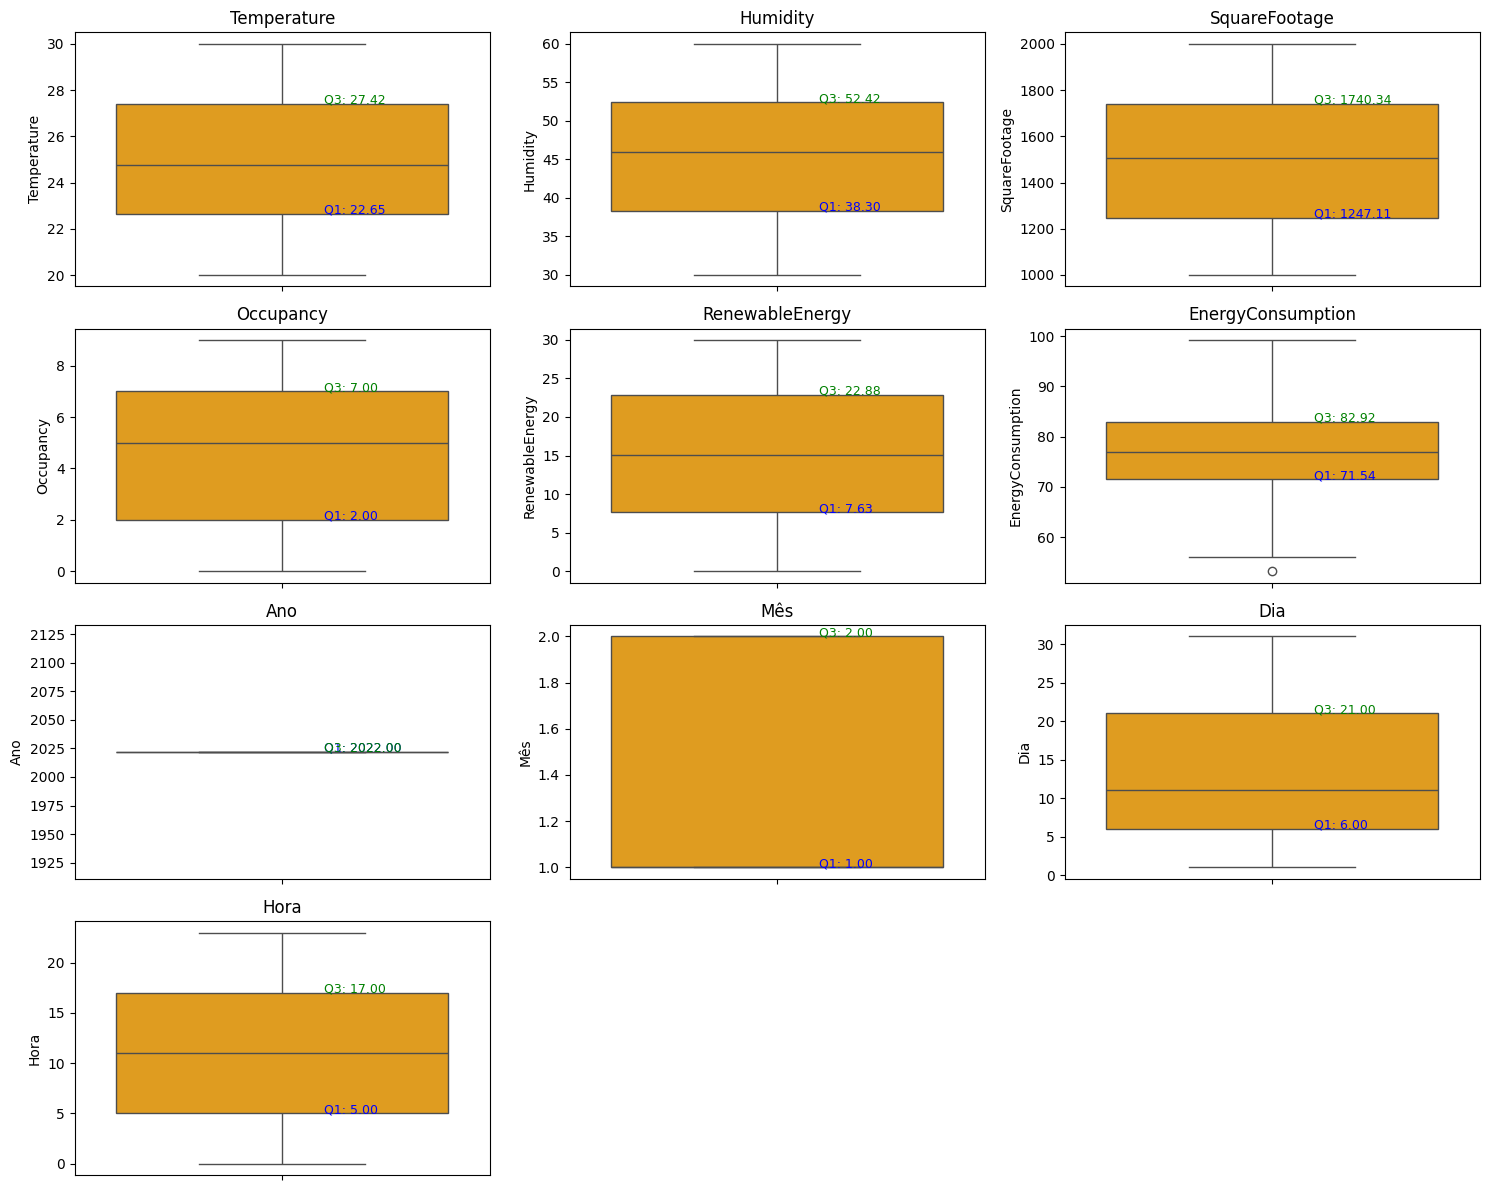

In [41]:
# Filtrar apenas colunas numéricas
numerical_columns = df_analise.select_dtypes(include=['number']).columns

# Definir o número de gráficos por figura
n_rows, n_cols = 4, 3
plots_per_fig = n_rows * n_cols
n_total = len(numerical_columns)
n_figs = math.ceil(n_total / plots_per_fig)

# Gerar as figuras
for fig in range(n_figs):
    fig_cols = numerical_columns[fig*plots_per_fig : (fig+1)*plots_per_fig]
    
    fig_obj, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
    axes = axes.flatten()

    for i, col in enumerate(fig_cols):
        sns.boxplot(y=df_analise[col], ax=axes[i], color='orange')  # Cor laranja
        axes[i].set_title(col)
        
        # Calcular Q1 e Q3
        q1 = df_analise[col].quantile(0.25)
        q3 = df_analise[col].quantile(0.75)
        
        # Adicionar texto com os valores de Q1 e Q3
        axes[i].text(0.1, q1, f'Q1: {q1:.2f}', color='blue', fontsize=9)
        axes[i].text(0.1, q3, f'Q3: {q3:.2f}', color='green', fontsize=9)

    # Remover eixos vazios (caso o número de variáveis não complete a grade)
    for j in range(len(fig_cols), plots_per_fig):
        fig_obj.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()


<div style="border-left: 6px solid #FF9800; background-color: #f9f9f9; padding: 15px; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0,0,0,0.1);">
  <h3 style="margin: 0; color: #FF5722;">📌 Comentário:</h3>

  <p style="margin-top: 5px; color: rgb(0, 0, 0); line-height: 1.6; text-align: justify; font-family: 'Segoe UI', sans-serif;">
    A análise indica que não há presença de outliers nos dados, o que contribui para uma maior estabilidade dos modelos estatísticos e preditivos.
    <br><br>
    Observa-se também que a variável <strong>ano</strong> apresenta baixa variabilidade, o que pode torná-la pouco relevante para fins analíticos ou preditivos.
    <br><br>
    A variável alvo, <strong>EnergyConsumption</strong>, também demonstra pouca variabilidade, o que pode dificultar a diferenciação entre os registros e impactar a performance de modelos supervisionados.
    <br><br>
    Por fim, a variável <strong>mês</strong> assume apenas dois valores distintos, sugerindo que os dados foram coletados em um período restrito de tempo, o que pode limitar a generalização dos resultados.
  </p>
</div>


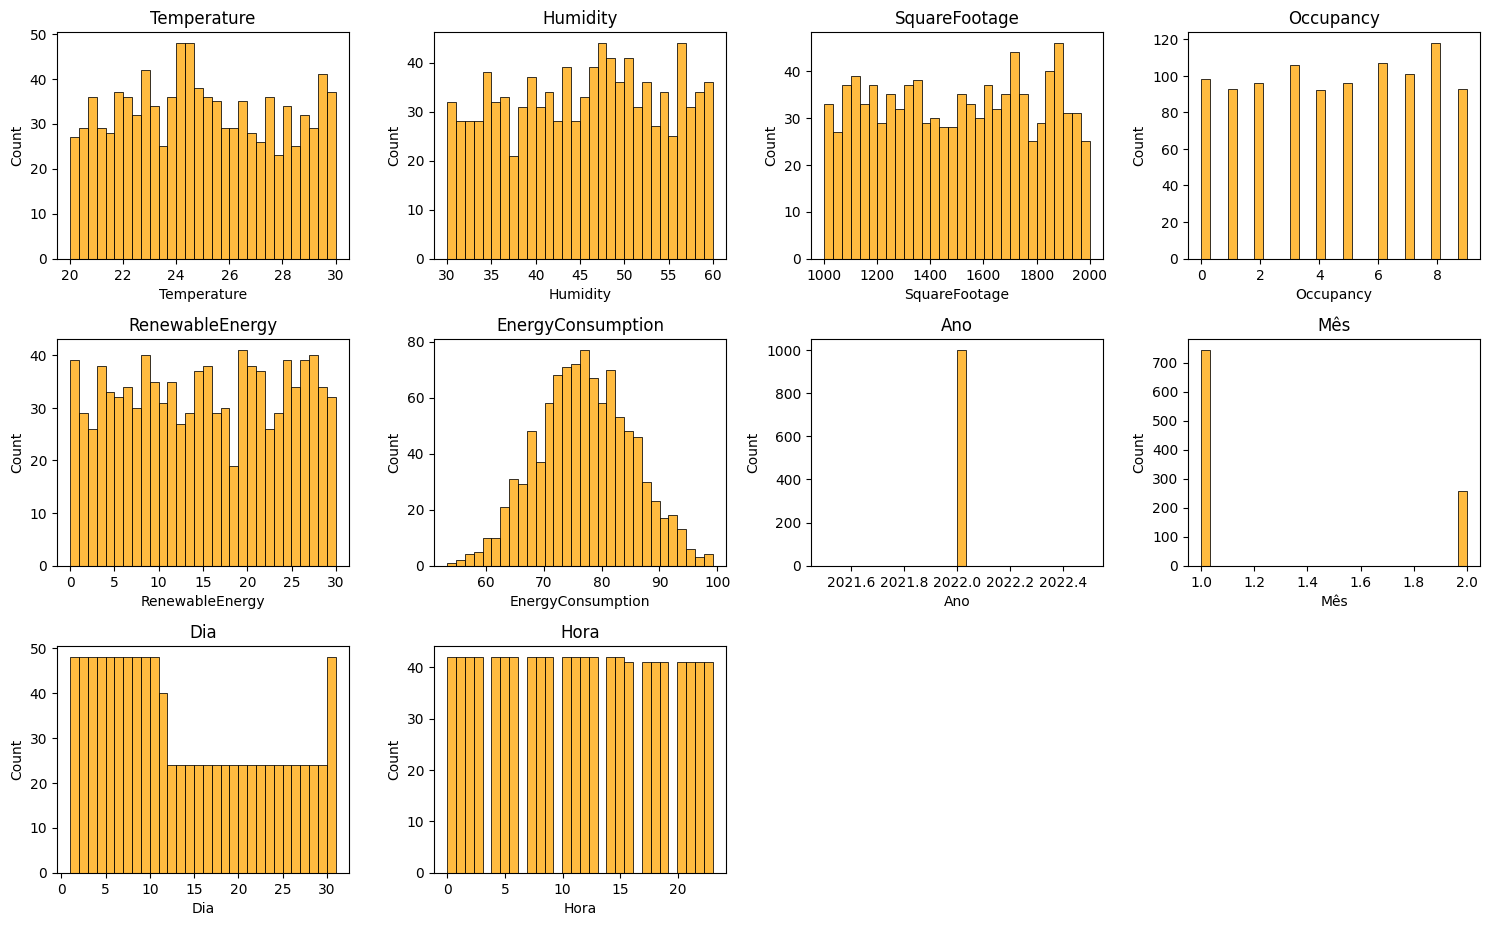

In [42]:
# Filtrar apenas colunas numéricas
numerical_columns = df_analise.select_dtypes(include=['number']).columns

# Definir o número de gráficos por figura
n_rows, n_cols = 4, 4
plots_per_fig = n_rows * n_cols
n_total = len(numerical_columns)
n_figs = math.ceil(n_total / plots_per_fig)

# Gerar as figuras com histogramas
for fig in range(n_figs):
    fig_cols = numerical_columns[fig*plots_per_fig : (fig+1)*plots_per_fig]
    
    fig_obj, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
    axes = axes.flatten()

    for i, col in enumerate(fig_cols):
        sns.histplot(data=df_analise, x=col, ax=axes[i], kde=False, bins=30, color='orange')
        axes[i].set_title(col)

    # Remover eixos vazios (caso o número de variáveis não complete a grade)
    for j in range(len(fig_cols), plots_per_fig):
        fig_obj.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()


<div style="border-left: 6px solid #FF9800; background-color: #f9f9f9; padding: 15px; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0,0,0,0.1);">
  <h3 style="margin: 0; color: #FF5722;">📌 Comentário:</h3>

  <p style="margin-top: 5px; color: rgb(0, 0, 0);">

    - É identificado uma distribuição variável na maioria das variáveis;

    - A variável ano não apresenta mudança;

    - Não é encontrado nenhum padrão entre as variáveis explicativas;

    - temos um comportamento da variável alvo próximo de uma curva normal.

  </p>
</div>

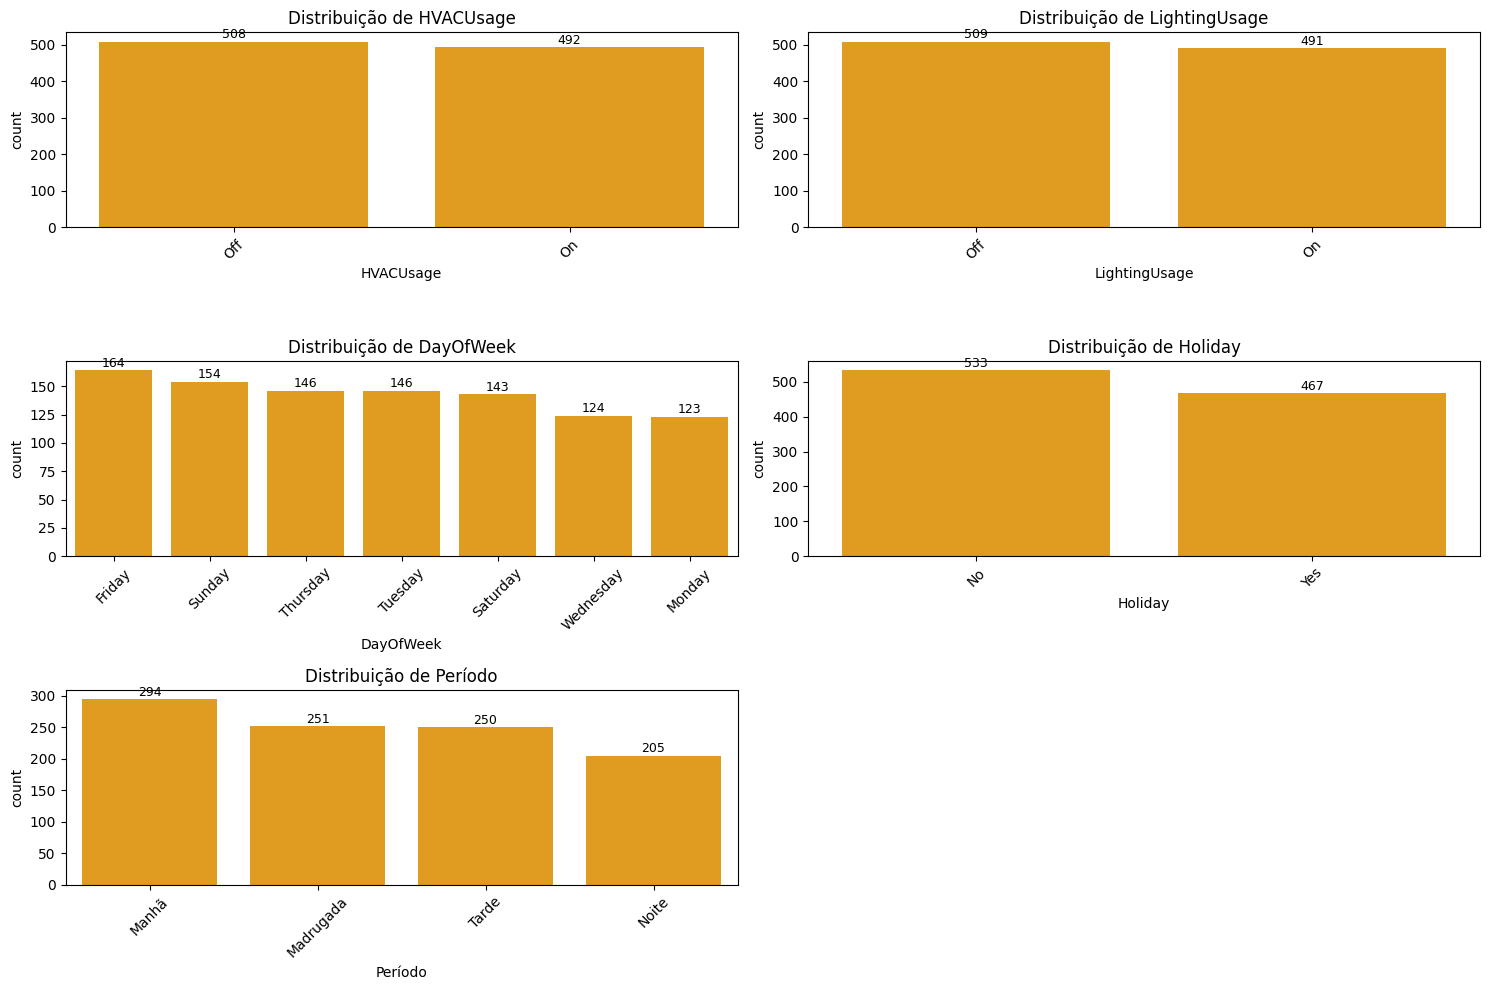

In [43]:
# Filtrar colunas do tipo 'object'
object_columns = df_analise.select_dtypes(include=['object']).columns

# Definir layout dos gráficos
n_rows, n_cols = 3, 2
plots_per_fig = n_rows * n_cols
n_total = len(object_columns)
n_figs = math.ceil(n_total / plots_per_fig)

# Gerar os gráficos
for fig in range(n_figs):
    fig_cols = object_columns[fig*plots_per_fig : (fig+1)*plots_per_fig]
    
    fig_obj, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, col in enumerate(fig_cols):
        ax = axes[i]
        sns_plot = sns.countplot(data=df_analise, x=col, ax=ax, 
                                 order=df_analise[col].value_counts().index, 
                                 color='orange')
        ax.set_title(f'Distribuição de {col}')
        ax.tick_params(axis='x', rotation=45)

        # Adiciona os valores acima das barras
        for p in sns_plot.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height),
                    ha='center', va='bottom', fontsize=9)
    
    # Remover eixos vazios
    for j in range(len(fig_cols), plots_per_fig):
        fig_obj.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


<div style="border-left: 6px solid #FF9800; background-color: #f9f9f9; padding: 15px; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0,0,0,0.1);">
  <h3 style="margin: 0; color: #FF5722;">📌 Comentário:</h3>

  <p style="margin-top: 5px; color: rgb(0, 0, 0);">
    podemos concluir que a distribuição das variáveis categóricas analisadas é balanceada.
  </p>
</div>

<div style="margin-top: 40px; padding-bottom: 10px; border-bottom: 3px solid #E65100;">
  <h2 style="margin: 0; font-size: 1.9em; color: #FF9800; font-family: 'Segoe UI', sans-serif;">
    📊 2. Análise Bivariada
  </h2>
</div>

<p style="margin-top: 10px; font-size: 1.05em; color: #00796B; line-height: 1.6; text-align: justify; font-family: 'Segoe UI', sans-serif;">
Nesta seção, serão realizados os imports das bibliotecas e pacotes necessários para o desenvolvimento do notebook, importantes para gerar os dicionários dos dados.
</p>


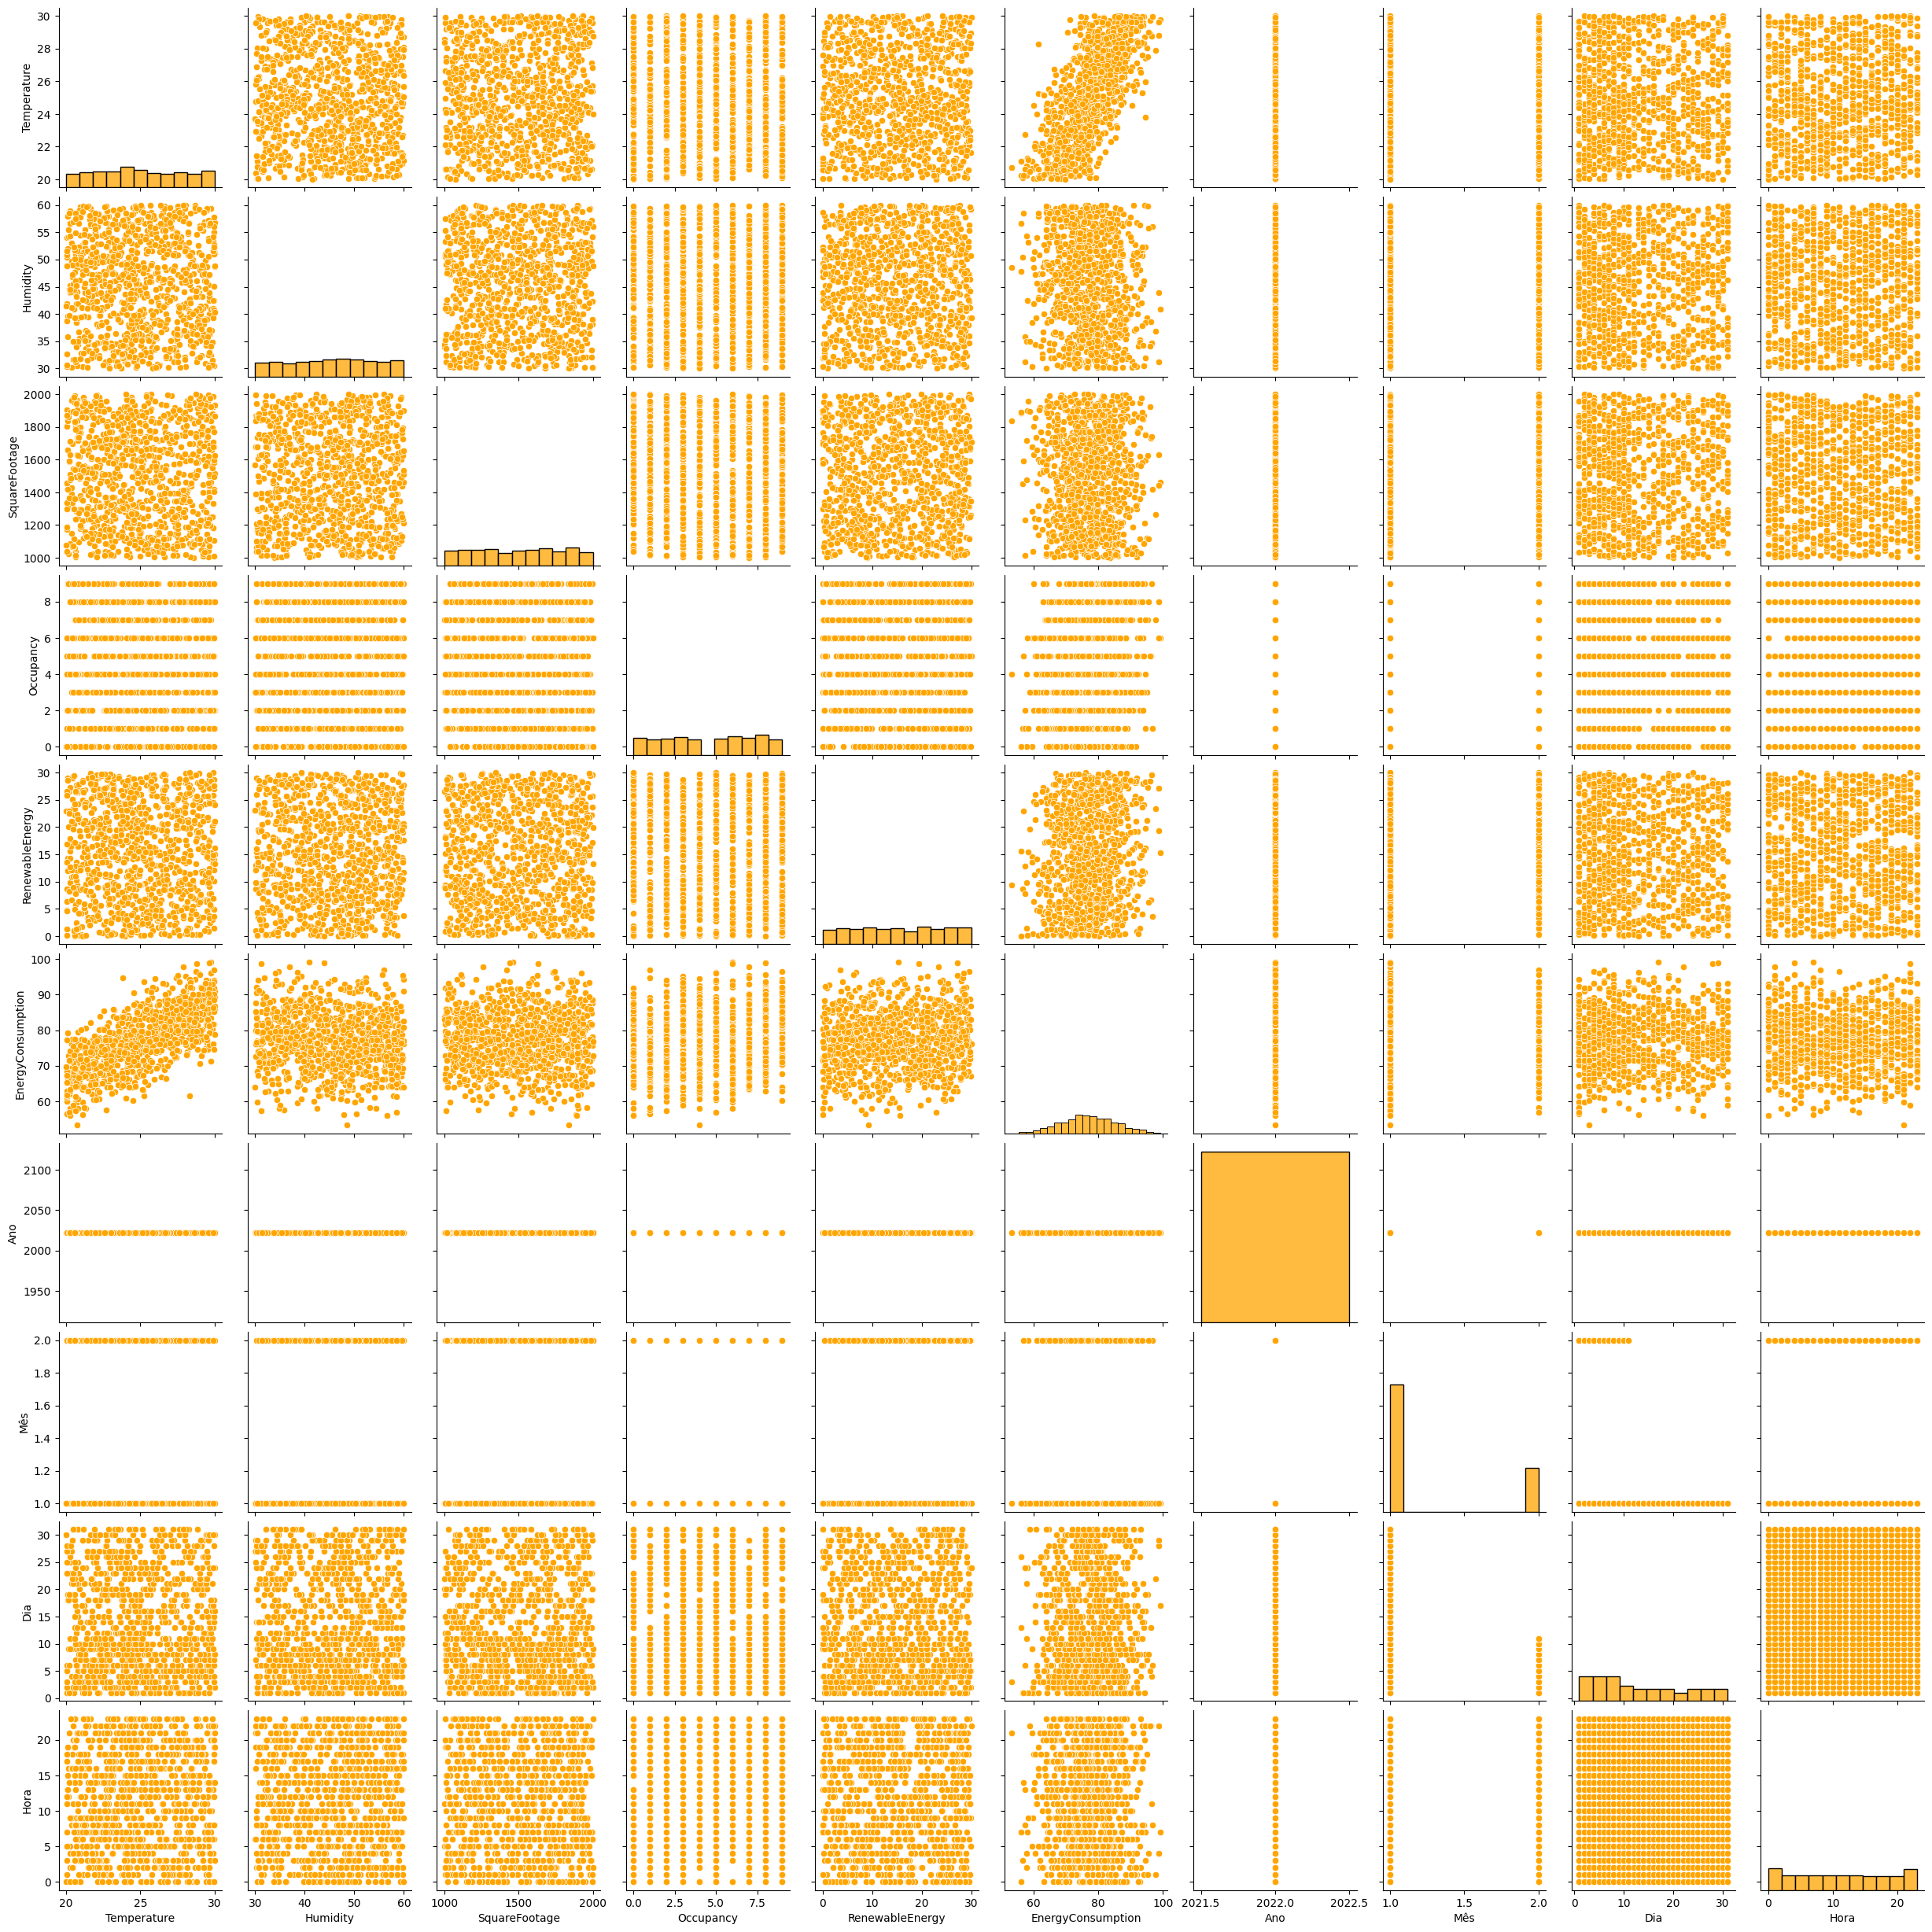

In [44]:
# Filtra apenas colunas numéricas
df_numerico = df_analise.select_dtypes(include='number')

# Cria os gráficos de dispersão:
sns.pairplot(df_numerico, 
             plot_kws={'color': 'orange'}, 
             diag_kws={'color': 'orange'})
plt.show()


<div style="border-left: 6px solid #FF9800; background-color: #f9f9f9; padding: 15px; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0,0,0,0.1);">
  <h3 style="margin: 0; color: #FF5722;">📌 Comentário:</h3>

  <p style="margin-top: 5px; color: rgb(0, 0, 0);">
    - Já podemos identiticar visualmente uma correlação entre a variável alvo (EnergyConsumption) e temperatura;
  </p>
</div>

In [45]:
# informações gerais do dataframe:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          1000 non-null   datetime64[ns]
 1   Temperature        1000 non-null   float64       
 2   Humidity           1000 non-null   float64       
 3   SquareFootage      1000 non-null   float64       
 4   Occupancy          1000 non-null   int64         
 5   HVACUsage          1000 non-null   object        
 6   LightingUsage      1000 non-null   object        
 7   RenewableEnergy    1000 non-null   float64       
 8   DayOfWeek          1000 non-null   object        
 9   Holiday            1000 non-null   object        
 10  EnergyConsumption  1000 non-null   float64       
 11  Ano                1000 non-null   int32         
 12  Mês                1000 non-null   int32         
 13  Dia                1000 non-null   int32         
 14  Hora     

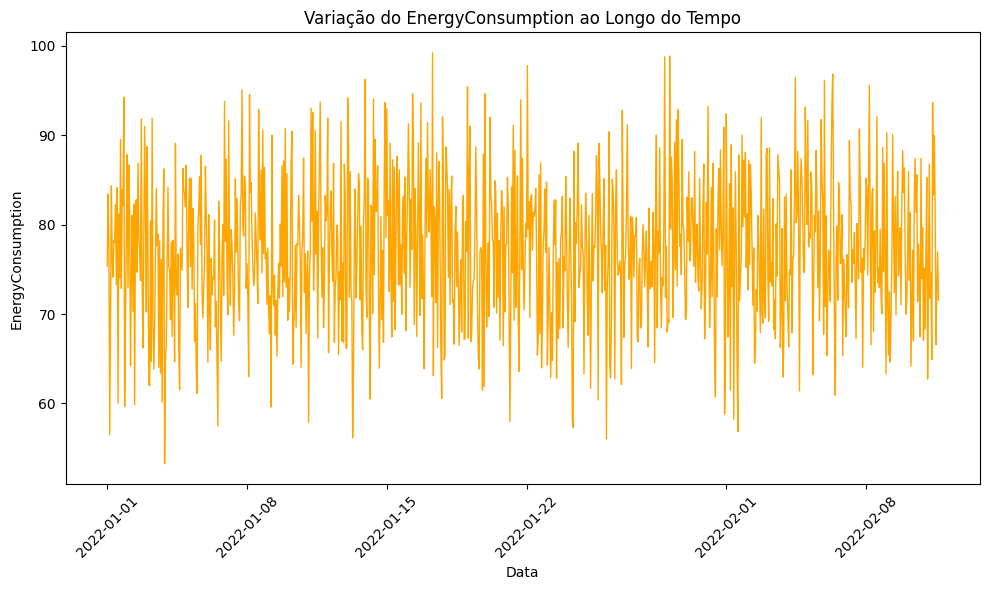

In [46]:
import matplotlib.pyplot as plt

# Garantir que a coluna 'Timestamp' seja datetime
df_raw['Timestamp'] = pd.to_datetime(df_raw['Timestamp'])

# Plotar gráfico de EnergyConsumption variando com Timestamp
plt.figure(figsize=(10, 6))
plt.plot(df_raw['Timestamp'], df_raw['EnergyConsumption'], color='orange', linewidth=1)
plt.title('Variação do EnergyConsumption ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('EnergyConsumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
